# Aprendizaje de máquina supervisado

## Objetivo

Demostrar un procedimiento típico de entrenamiento de un algoritmo de aprendizaje de máquina supervisado.

## Descripción

Construiremos un modelo predictivo de clasificación de automóviles; los automóviles se clasificarán como muy buenos, buenos, aceptables o inaceptables con base en las siguientes características:

* Precio de venta
* Costo de mantenimiento
* Número de puertas
* Capacidad de pasajeros
* Tamaño de la cajuela
* Seguridad

A grandes rasgos el proceso consiste de presentarle una serie de ejemplos a un algoritmo de aprendizaje; cada ejemplo representa un automóvil (modelado a partir de las características anteriormente mencionadas) y una clasificación (posiblemente establecida por un experto en el tema). El algoritmo aprenderá a reconocer el patrón de valores de las características definitorias de cada clasificación y después aplicará el patrón aprendido a nuevos ejemplos que le presentemos.

El proceso de entrenamiento del algoritmo implica conocer los datos con los que estemos trabajando, determinar cuáles datos utilizaremos para entrenar y cuáles para hacer control de calidad, ejecutar el entrenamiento, y finalmente analizar la calidad del aprendizaje.

## Árboles de decisión

Trabajaremos con un algoritmo de aprendizaje de máquina supervisado llamado **árboles de decisión**.

Este algoritmo recursivamente realiza particiones en los datos con base en alguna de las características del conjunto de datos.

Tiene la particularidad de ser autoexplicativo, es decir para cualquier clasificación que determine podemos visualizar cuál fue el proceso de decisión que le llevó a dicha conclusión.

En este ejercicio no entraremos en detalle de cómo funciona o cómo se implementa este algoritmo, pues estaremos más concentrados en demostrar el proceso de uso.

## Metodología

A continuación se demuestra paso a paso el proceso de entrenamiento y aplicación del modelo predictivo. Desarrollaremos el proceso utilizando el lenguaje de programación `R`.


# Demostración

Importamos la biblioteca `rpart` que implementa el algoritmo de árboles de decisión.

In [40]:
library(rpart)

set.seed(42)


También importamos el conjunto de datos `car.data`, que utilizaremos para entrenar nuestro modelo predictivo.

Estos datos los traemos desde el repositorio público de UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets.html)

In [16]:
df <- read.csv(url(":"), header=F)

Definimos nombres para las variables

In [81]:
colnames(df) <- c('buying_price', 'maintenance_cost', 'doors', 'persons', 'boot', 'security', 'classification')

Podemos ver una muestra de los datos

In [29]:
head(df)

buying_price,maintenance_cost,doors,persons,boot,security,classification
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc


In [35]:
nrow(df)

[1] 1728

In [36]:
summary(df)

 buying_price maintenance_cost   doors     persons       boot     security  
 high :432    high :432        2    :432   2   :576   big  :576   high:576  
 low  :432    low  :432        3    :432   4   :576   med  :576   low :576  
 med  :432    med  :432        4    :432   more:576   small:576   med :576  
 vhigh:432    vhigh:432        5more:432                                    
 classification
 acc  : 384    
 good :  69    
 unacc:1210    
 vgood:  65    

Generar conjuntos de entrenamiento y pruebas

In [42]:
df$rgroup <- floor(nrow(df) * runif(nrow(df)))
cut <- round(nrow(df) * 0.20)

testing <- df[df$rgroup %in% sort(df$rgroup)[1:cut],]
training <- df[df$rgroup %in% sort(df$rgroup)[(cut + 1):nrow(df)],]

nrow(testing)
nrow(training)

[1] 348

[1] 1383

In [44]:
summary(testing)

 buying_price maintenance_cost   doors    persons       boot     security  
 high :78     high : 92        2    :80   2   :111   big  :121   high:118  
 low  :85     low  : 81        3    :83   4   :119   med  :111   low :101  
 med  :92     med  : 72        4    :92   more:118   small:116   med :129  
 vhigh:93     vhigh:103        5more:93                                    
                                                                           
                                                                           
 classification     rgroup     
 acc  : 84      Min.   :  0.0  
 good : 10      1st Qu.: 86.0  
 unacc:242      Median :179.0  
 vgood: 12      Mean   :173.4  
                3rd Qu.:258.5  
                Max.   :338.0  

In [46]:
summary(training)

 buying_price maintenance_cost   doors     persons       boot     security  
 high :356    high :341        2    :352   2   :466   big  :456   high:459  
 low  :347    low  :352        3    :350   4   :457   med  :465   low :476  
 med  :340    med  :360        4    :341   more:460   small:462   med :448  
 vhigh:340    vhigh:330        5more:340                                    
                                                                            
                                                                            
 classification     rgroup    
 acc  :302      Min.   : 338  
 good : 59      1st Qu.: 723  
 unacc:969      Median :1081  
 vgood: 53      Mean   :1060  
                3rd Qu.:1412  
                Max.   :1727  

Entrenar el modelo

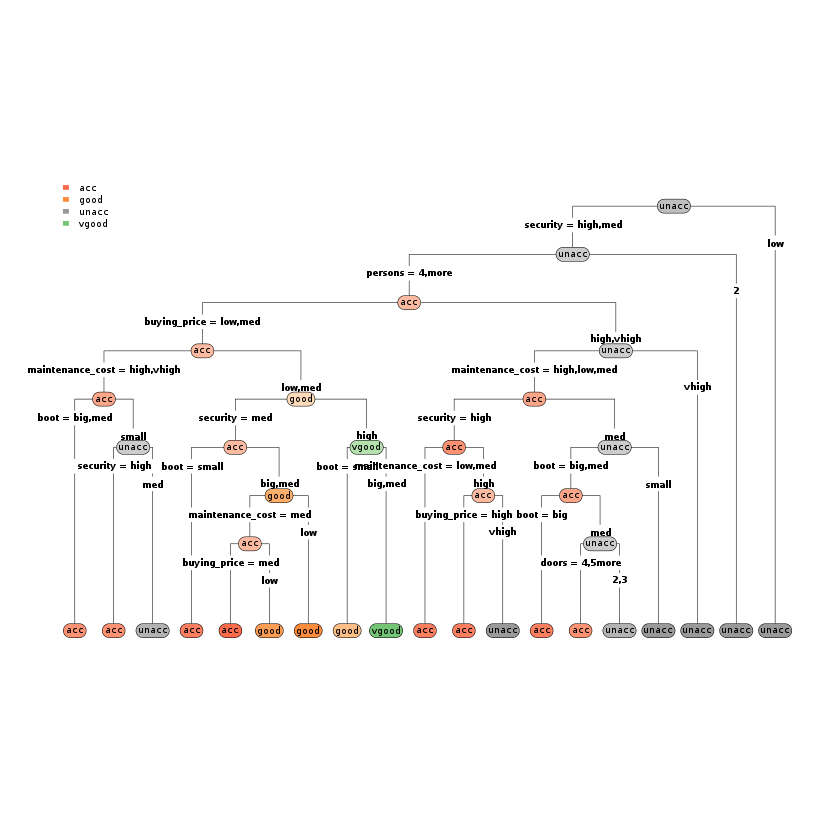

In [77]:
library(rpart.plot)

formula <- classification ~ buying_price + maintenance_cost + doors + persons + boot + security
tree <- rpart(formula, data = training)

#par(cex=0.6)
rpart.plot(tree, type=4, tweak=1.5, extra=0)
#text(tree)

In [78]:
table(training[training$security == 'low',]$classification)


  acc  good unacc vgood 
    0     0   476     0 

Evaluar el modelo

In [79]:
testing$preds <- predict(tree, newdata = testing, type = 'class')
cM <- table(actual = testing$classification, expected = testing$preds)

print(cM)

       expected
actual  acc good unacc vgood
  acc    80    1     3     0
  good    0    9     0     1
  unacc  11    0   231     0
  vgood   3    0     0     9


Exactitud

In [68]:
sum(diag(cM)) / sum(cM)

[1] 0.9454023